# Simple Linear Regression

당뇨병 데이터 구성 및 평가 기준

1. 데이터셋 로드 : sklearn.datasets.load_diabetes()
2. 피처 : 나이, 성별, 체질량지수, 혈압, 6가지 혈청 수치 (스케일링 완료)
3. 타겟 : 1년뒤 측정한 당뇨병의 진행률
4. 모델 : 선형 회귀 (linear_model.LinearRegression())
5. 평가기준 : RMSE (Root Mean Squared Error)

## Univariate Linear Regression (단변수 선형회귀)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [2]:
# Load the diabetes dataset
# 나이, 성별, 체질량지수, 혈압, 6가지 혈청 수치  --> already scaled
diabetes = datasets.load_diabetes()
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [4]:
print(diabetes.DESCR) # 어떤 데이터가 어떻게 구성되어있는지 출력

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [7]:
diabetes.data.shape # shape 확인

(442, 10)

In [6]:
diabetes.target.shape # 타겟 shape 확인

(442,)

In [5]:
#1년 뒤 측정한 당뇨병의 진행률 - target(label)
diabetes.target[:5]

array([151.,  75., 141., 206., 135.])

In [8]:
# 데이터 프레임으로 바꾸어 확인
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names) # 데이터 프레임으로 확인
df.head() # 5개의 행, 전체 열 간단히 확인 가능

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


## univariate linear regression data 생성

In [10]:
# Use only one feature (단변수 선형회귀)

# 시각화를 위해 단변수 선형회귀를 해야하는데, 그러려면 피처를 하나만 고름
# bmi로 실습
dia_X = df["bmi"].values
dia_X.shape # (442,) : 벡터 형태임 => 사이킷런의 데이터는 2차원 배열 형태로 만들어줘야함 => reshape
# reshape : 2차원 배열 형태로 생성
dia_X = df["bmi"].values.reshape(-1,1) #reshape(442,1) (o)

In [11]:
# 훈련셋, 검증셋 분활 : 슬라이싱 이용
dia_X_train = dia_X[:-20] # 뒤에서 20번째 까지, 
dia_X_test = dia_X[-20:] # 뒤에서 부터 20번째

dia_X_train.shape, dia_X_test.shape

((422, 1), (20, 1))

In [33]:
# targets data 를 training/testing set 으로 분리

dia_y_train = diabetes.target[:-20] # (422,)
dia_y_test = diabetes.target[-20:] #(20,)

dia_y_train.shape, dia_y_test.shape

((422,), (20,))

## sklearn model 이용

In [41]:
# regression object 생성

regr = linear_model.LinearRegression()

In [42]:
from sklearn import set_config

set_config(print_changed_only=False)

In [46]:
# training set 을 이용하여 model 훈련

regr.fit(dia_X_train, dia_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, positive=False)

In [47]:
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [938.23786125]
Intercept: 
 152.91886182616113


In [48]:
print(regr.predict(np.array([[-0.050]])))
print(regr.predict(np.array([[0.025]])))

[106.00696876]
[176.37480836]


In [49]:
y_pred = regr.predict(dia_X_test)

In [50]:
dia_y_test.shape

(20,)

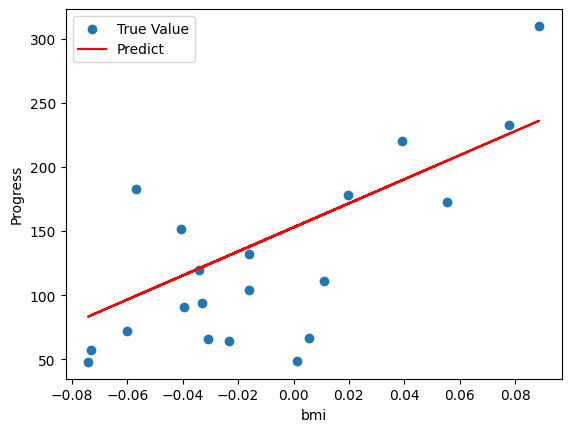

In [51]:
# 예측값, 정답값 사이의 시각화로 예측이 잘되었는지 확인
plt.scatter(dia_X_test, dia_y_test, label = "True Value")
plt.plot(dia_X_test, y_pred, color='r', label = "Predict")
plt.xlabel("bmi")
plt.ylabel("Progress")
plt.legend()

## R2 계산

In [52]:
print("결정계수 : {:.2f}".format(r2_score(dia_y_test, y_pred)))

결정계수 : 0.47


## Multivariate Linear Regression (다변수 선형회귀)

bmi, bp 두가지 변수를 이용한 Linear Regression

In [69]:
# 모든 feature 를 사용
dia_X = df.values

In [70]:
dia_X.shape

(442, 10)

In [93]:
# 데이터를 train/test 세트로 분할
dia_X_train = dia_X[:-20] # 뒤에서 20번째 까지, 
dia_X_test = dia_X[-20:] # 뒤에서 부터 20번째

dia_X_train.shape, dia_X_test.shape # (422,1),(20,1)

((422, 10), (20, 10))

In [94]:
# target을 train/test 세트로 분할
dia_y_train  = diabetes.target[:-20]
dia_y_test  = diabetes.target[-20:]

dia_y_train.shape, dia_y_test.shape 

((422,), (20,))

In [95]:
# linear regression object 생성
regr = linear_model.LinearRegression()

In [96]:
# 학습 세트를 사용하여 모델 학습
regr.fit(dia_X_train, dia_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, positive=False)

In [97]:
# 테스트 세트를 사용하여 예측하기
y_pred = regr.predict(dia_X_test)

In [98]:
# R2 계산 
print("결정계수: {:.2f}".format(r2_score(dia_y_test, y_pred)))

결정계수: 0.59


# KNN (K-Nearest Neighbors, 최근접 이웃)

### iris dataset

iris.feature_names : 

Sepal Length : 꽃받침 길이  
Sepal Width  : 꽃받침 너비   
Petal Length  : 꽃잎 길이  
Petal Width   :  꽃잎 너비 

Species (꽃의 종류) :  setosa / versicolor / virginica 의 3종류로 구분된다.

**꽃받침 길이, 너비 두가지 feature 를 가지고 KNN 알고리즘을 이용하여 꽃의 종류 분류**

**neighbors.KNeighborsClassifier(n_neighbors, weights=weights)**

- weights :  

    - uniform : uniform weights. 모든 neighbor 의 가중치를 동일하게 취급  
    - distance : neighbor 의 거리에 반비례하여 가중치 조정

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [3]:
iris = load_iris() # 딕셔너리 형태로 키에 각 데이터들이 있음
# 주의 : 타겟 데이터가 0 1 2 순으로 섞이지 않고 되어있음 -> 섞어야함
# 안섞으면 검증은 2번만 하고 훈련은 0 1로만 훈련됨

print(iris.data.shape)
print(iris.feature_names)
print(iris.target_names)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
X = iris.data[:,:2] # sepal length, sepal width 두개만 사용
y = iris.target

In [5]:
X.shape, y.shape #(150,2) (150,)

((150, 2), (150,))

In [6]:
# 사이킷런의 데이터셋은 잘 정제되어 있기 때문에 에러날 일이 없는데
# 에러가 난다면 거의 무조건 shape가 잘못 되어있어서이므로 shape를 잘 확인하자
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 2), (38, 2), (112,), (38,))

### KNN object 생성 및 train

In [7]:
clf = KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [8]:
y_predict = clf.predict(X_test)
y_predict

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[13,  0,  0],
       [ 0,  8,  8],
       [ 0,  2,  7]], dtype=int64)

### 예측의 정확도 평가

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7368421052631579

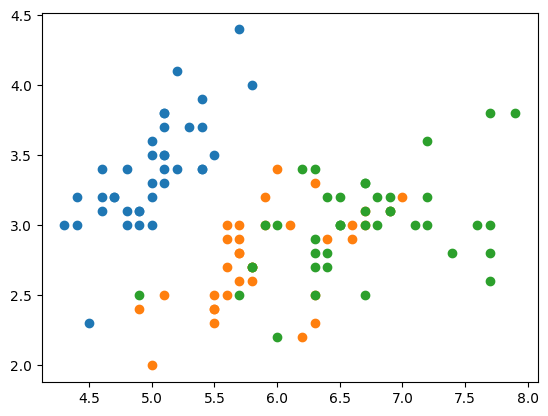

In [14]:
# 분류된것을 색으로 표시하여 2차원 공간에서 3개를 확인할 수 있음
import matplotlib.pyplot as plt

X_train[y_train==0] # 타겟이 0인것만 골라줌

# 방법 1
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1])
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1])
plt.scatter(X_train[y_train==2,0], X_train[y_train==2,1])

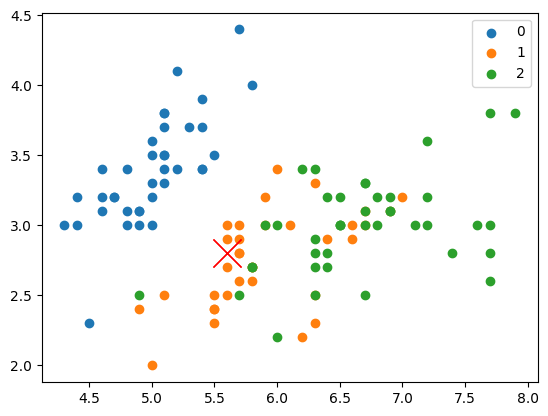

In [18]:
import matplotlib.pyplot as plt

for i in range(3):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], label=i)
    
plt.plot(X_test[20,0], X_test[20,1], c='r', marker='x', markersize=20)

plt.legend()
# 하나 선택해서 이게 올바르게 예측이 되는건지 확인하는 시각화
# 20번째 데이터를 골라서 해당 위치에 x 표시로 그려줌
# 20번째 데이터 주위에 어떤 레이블의 데이터가 많은지 확인 가능 => 2번
plt.plot(X_test[20, 0], X_test[20, 1], color='r', marker='x', markersize=20)


In [19]:
print(clf.predict(X_test[20:21]))

[1]


In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
cm

array([[13,  0,  0],
       [ 0,  8,  8],
       [ 0,  2,  7]], dtype=int64)

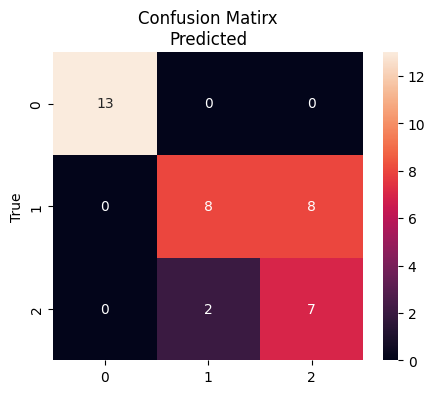

In [21]:
import seaborn as sns

plt.figure(figsize=(5,4))

ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_ylabel('True')
ax.set_title('Confusion Matirx\nPredicted')
None

## 실습

n_neighbors 를 변경하여 Test. Visualization 을 통하여 위 결과와 비교.

In [29]:
for i in range(1, 30):
    clf = KNeighborsClassifier(n_neighbors=i, weights='uniform')

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    print(f"n_neighbors={i}, accuracy={accuracy_score(y_test, y_pred):.4f}")

n_neighbors=1, accuracy=0.7368
n_neighbors=2, accuracy=0.7632
n_neighbors=3, accuracy=0.6842
n_neighbors=4, accuracy=0.8421
n_neighbors=5, accuracy=0.7632
n_neighbors=6, accuracy=0.7105
n_neighbors=7, accuracy=0.7105
n_neighbors=8, accuracy=0.6842
n_neighbors=9, accuracy=0.6579
n_neighbors=10, accuracy=0.7368
n_neighbors=11, accuracy=0.7105
n_neighbors=12, accuracy=0.7368
n_neighbors=13, accuracy=0.7368
n_neighbors=14, accuracy=0.7368
n_neighbors=15, accuracy=0.7368
n_neighbors=16, accuracy=0.7368
n_neighbors=17, accuracy=0.7368
n_neighbors=18, accuracy=0.7632
n_neighbors=19, accuracy=0.7632
n_neighbors=20, accuracy=0.8158
n_neighbors=21, accuracy=0.7895
n_neighbors=22, accuracy=0.7632
n_neighbors=23, accuracy=0.7632
n_neighbors=24, accuracy=0.7632
n_neighbors=25, accuracy=0.7632
n_neighbors=26, accuracy=0.7632
n_neighbors=27, accuracy=0.6842
n_neighbors=28, accuracy=0.7368
n_neighbors=29, accuracy=0.7368


# Decision Tree

In [31]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()

In [32]:
iris.data.shape

(150, 4)

### train / test split & accuracy check

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [34]:
clf = tree.DecisionTreeClassifier(max_depth=2, criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [35]:
y_pred = clf.predict(X_test)

In [36]:
accuracy_score(y_test, y_pred)

0.8888888888888888

## visualization with matplotlib

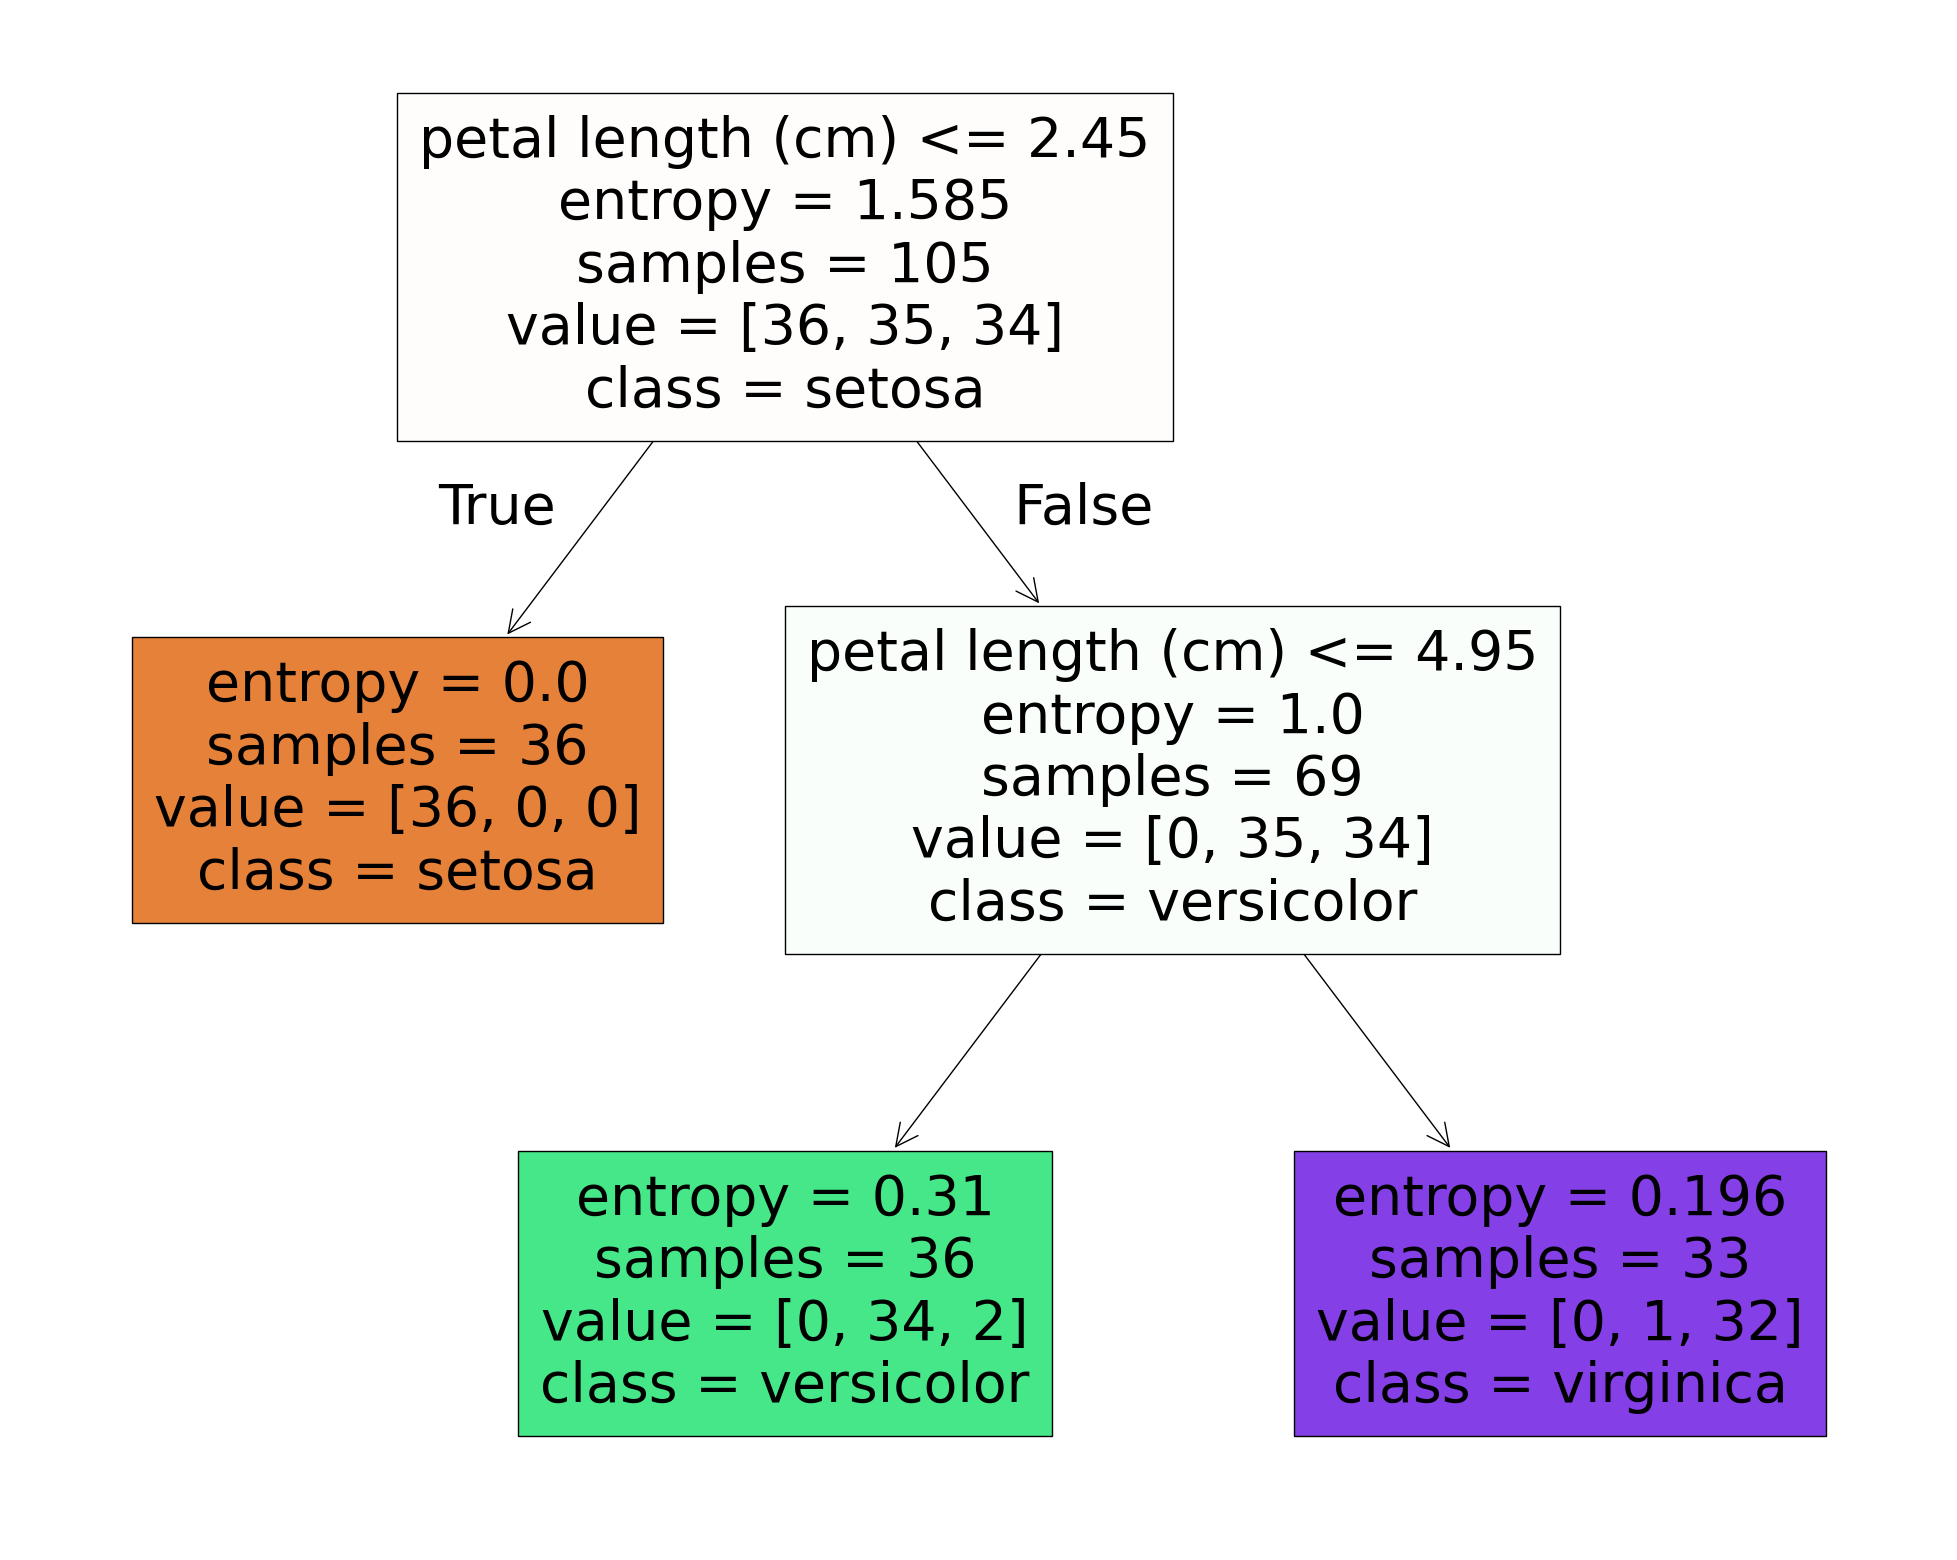

In [37]:
import matplotlib.pyplot as plt

# max_depth = 2로 설정한 경우
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

### max_depth를 설정하지 않은 경우

In [41]:
clf = tree.DecisionTreeClassifier(max_depth=None) # NONE 으로 설정시, 제한을 두지 않는 것
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9555555555555556

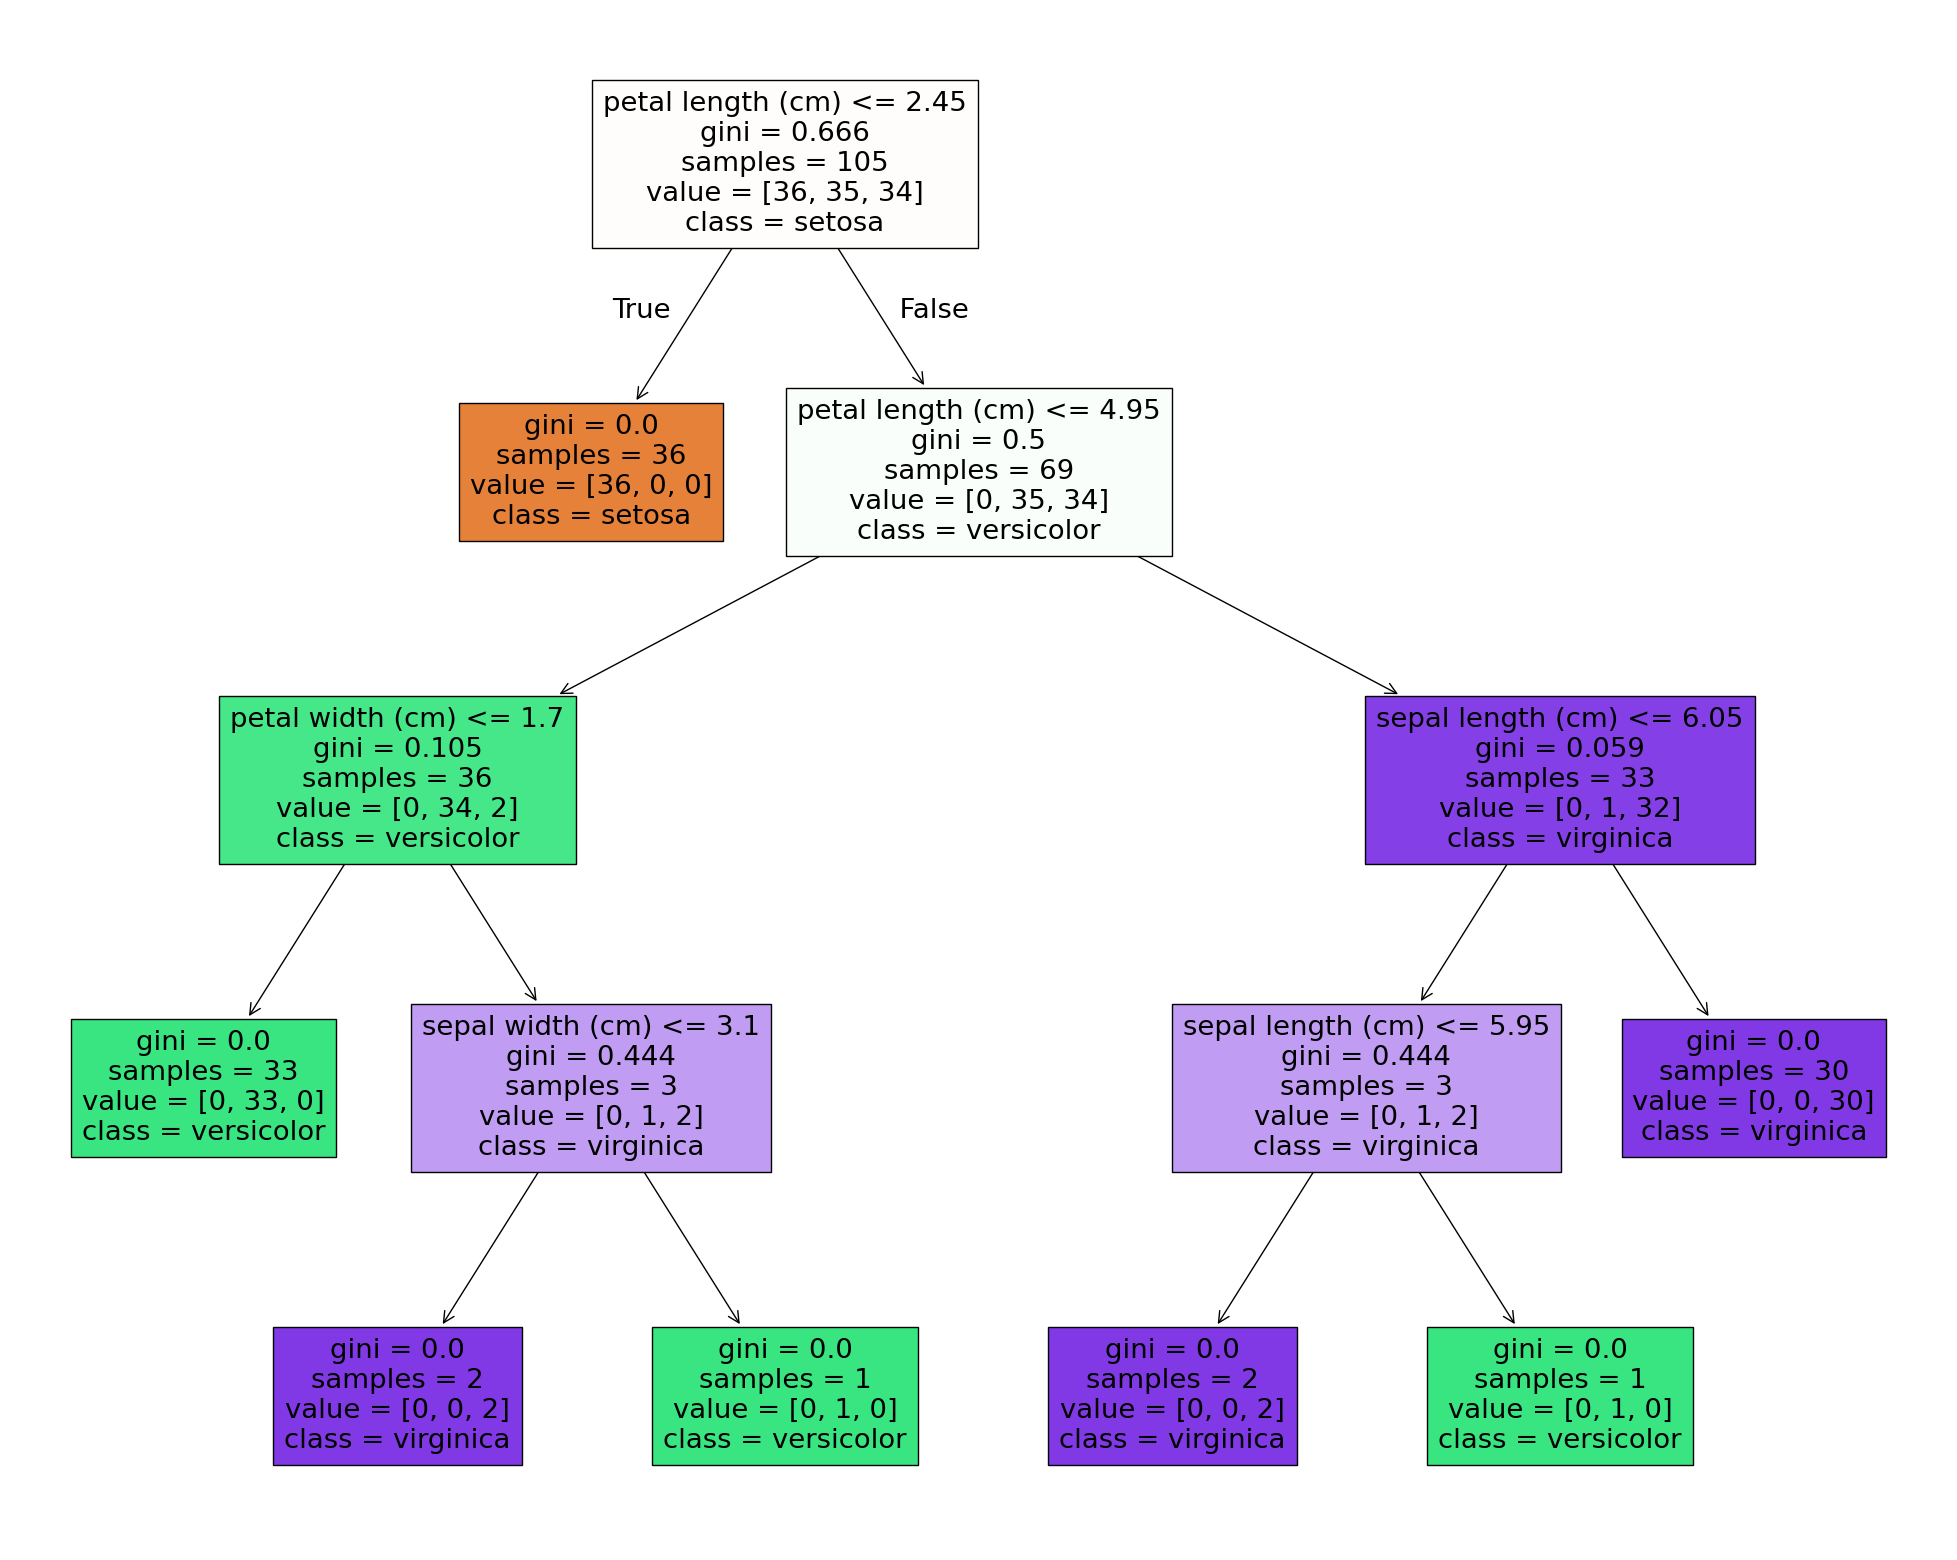

In [43]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)